In [25]:
#import library
import numpy as np                               # Mengimport library numpy untuk operasi numerik
import matplotlib.pyplot as plt                  # Mengimport library matplotlib untuk visualisasi data
%matplotlib inline                                
import cv2                                       # Mengimport library OpenCV untuk pemrosesan citra
import matplotlib.image as mpimg                # Mengimport library matplotlib untuk membaca dan menampilkan citra
from skimage import data                       # Mengimport modul data dari library skimage

In [26]:
#Read image
image = data.camera()                           # Membaca citra menggunakan fungsi camera() dari modul data


In [27]:
#Penerapan Histogram Equalization (HE)
image_equalized = cv2.equalizeHist(image)      # Mengaplikasikan histogram equalization pada citra


In [28]:
#Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))   # Membuat objek CLAHE dengan batasan clip dan ukuran grid yang ditentukan

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)               # Mengaplikasikan metode CLAHE pada citra asli

In [29]:
#Penerapan metode Contrast Stretching (CS)

# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')    # Membuat array kosong dengan ukuran yang sama dengan citra asli

# Apply Min-Max Contrasting
min = np.min(image)                            # Menentukan nilai minimum dari citra asli
max = np.max(image)                            # Menentukan nilai maksimum dari citra asli

# Mengiterasi melalui setiap piksel citra asli
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)    # Mengaplikasikan rumus Contrast Stretching pada setiap piksel citra asli

In [30]:
#Penerapan Metode Perkalian Konstanta
copyCamera = image.copy().astype(float)       # Mengcopy citra asli ke variabel copyCamera sebagai citra dengan tipe data float

m1,n1 = copyCamera.shape                       # Mendapatkan dimensi citra copyCamera
output1 = np.empty([m1, n1])                   # Membuat array kosong dengan ukuran yang sama dengan citra copyCamera

# Melakukan perkalian konstanta pada setiap piksel citra copyCamera
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

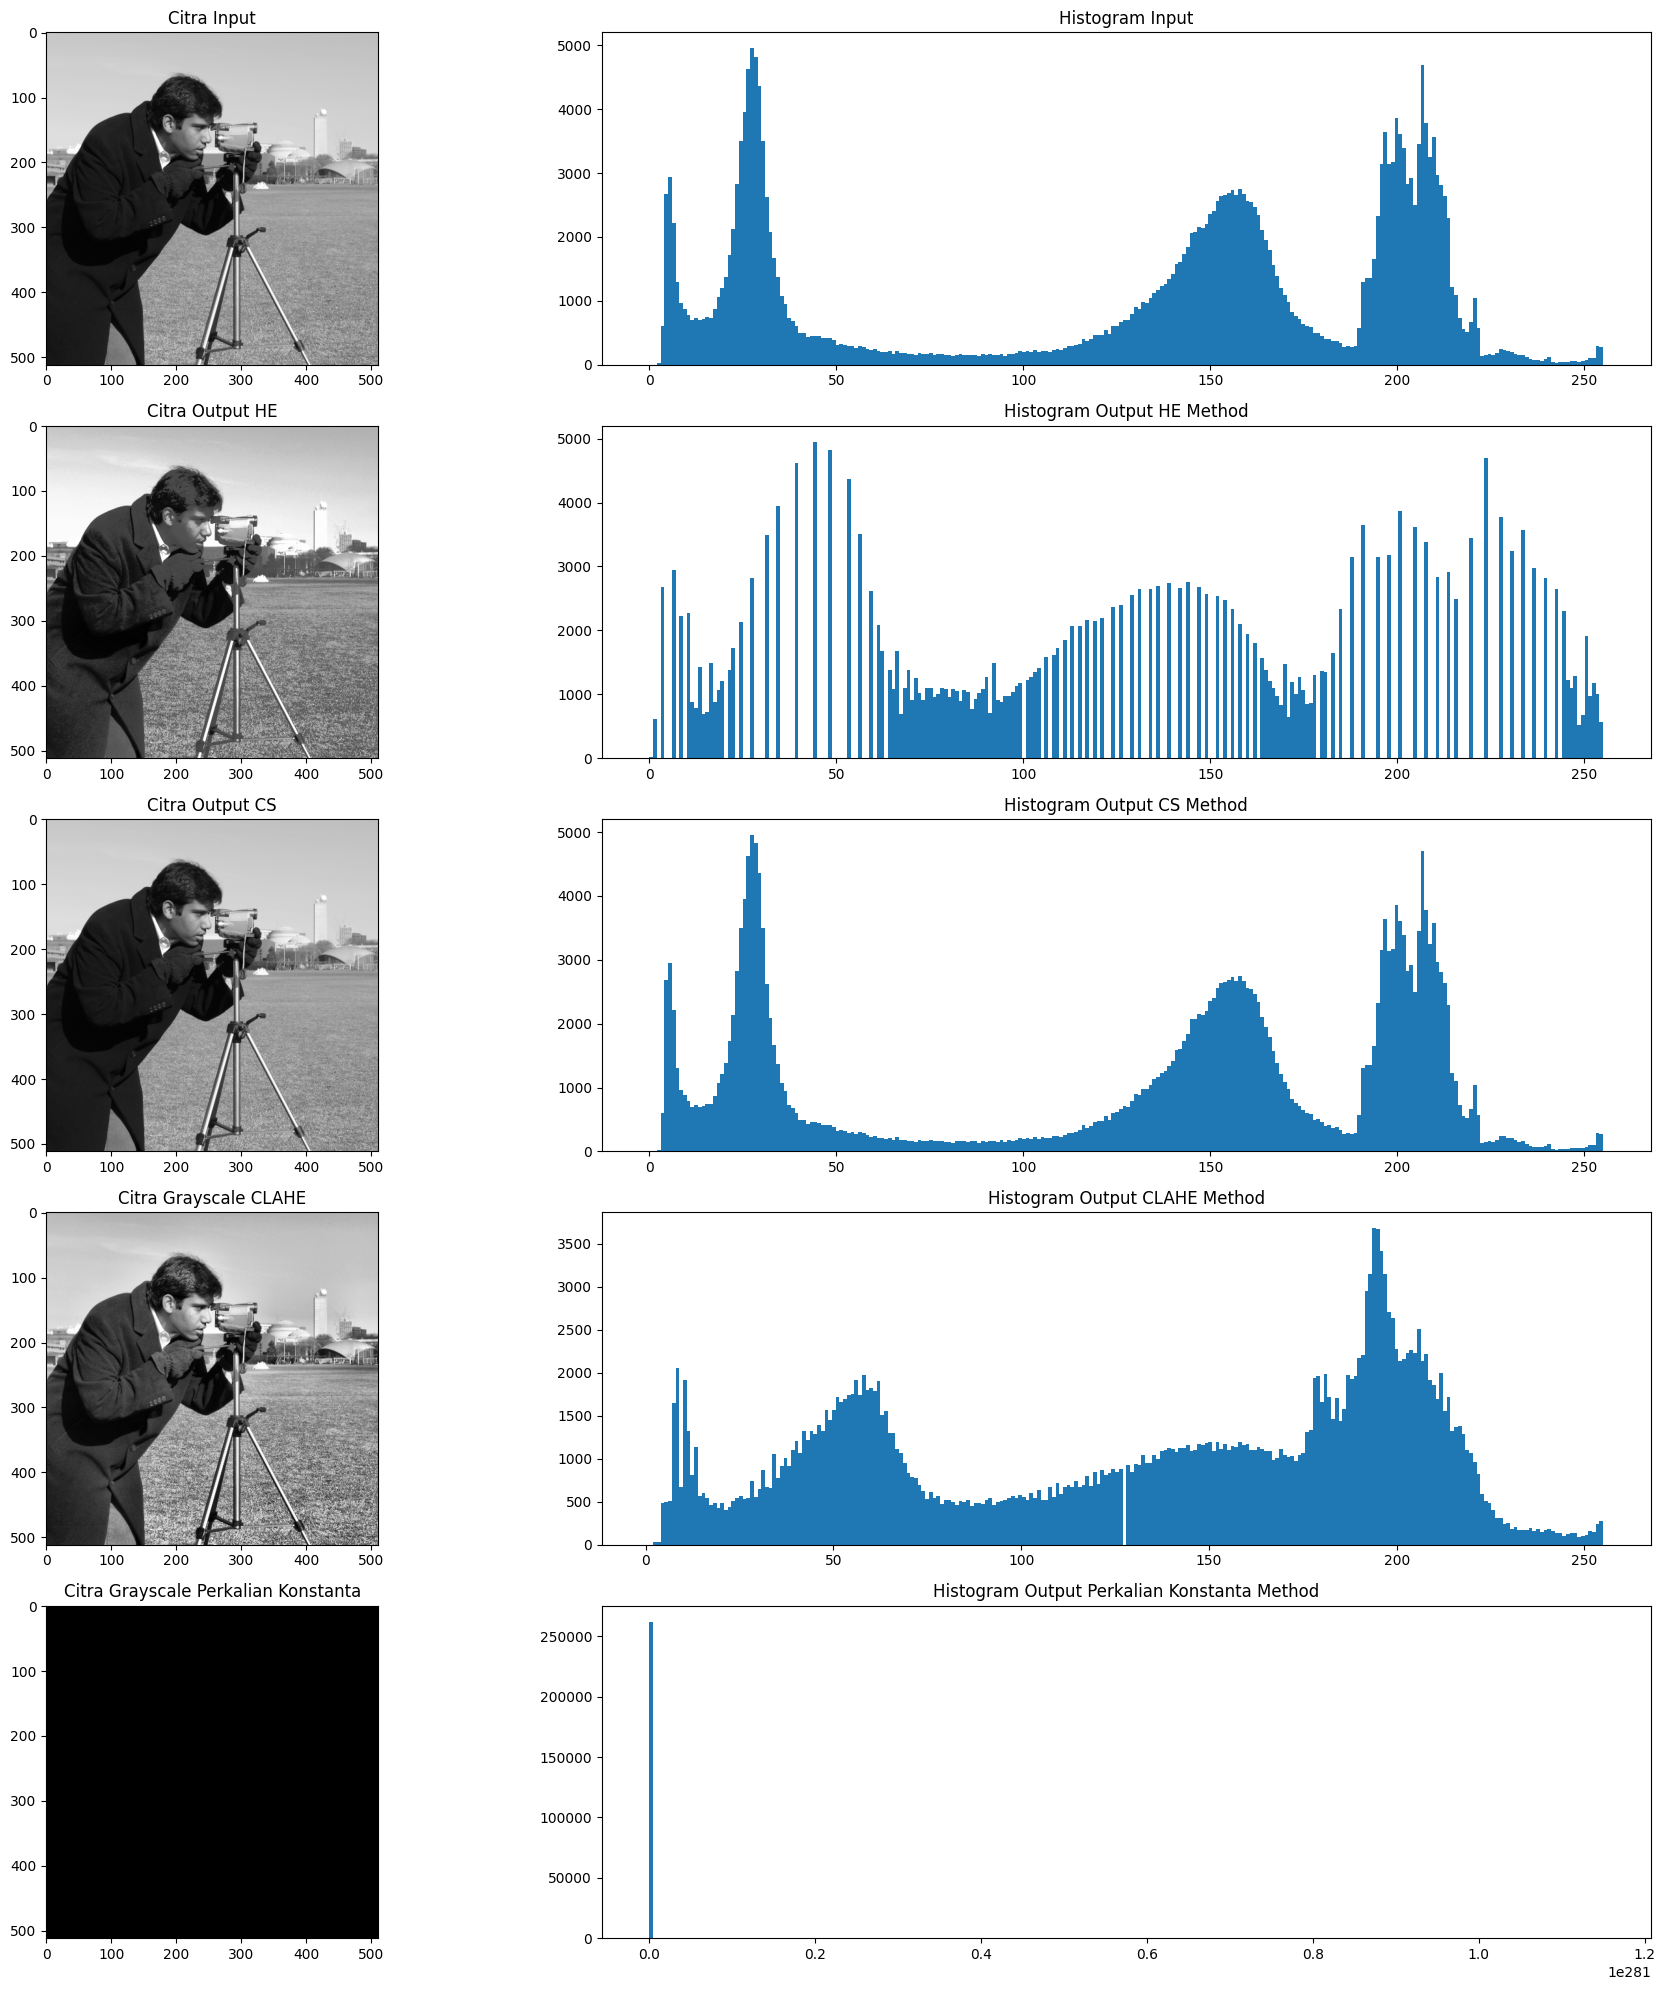

In [31]:
#Plot Image

# Membuat figure dengan 5 baris dan 2 kolom, dengan ukuran 20x20
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

# Menampilkan citra input pada subplot pertama
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")

# Menampilkan histogram citra input pada subplot kedua
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan citra output hasil histogram equalization pada subplot ketiga
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")

# Menampilkan histogram citra output hasil histogram equalization pada subplot keempat
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra output hasil contrast stretching pada subplot kelima
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")

# Menampilkan histogram citra output hasil contrast stretching pada subplot keenam
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra output hasil CLAHE pada subplot ketujuh
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")

# Menampilkan histogram citra output hasil CLAHE pada subplot kedelapan
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra output hasil perkalian konstanta pada subplot kesembilan
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")

# Menampilkan histogram citra output hasil perkalian konstanta pada subplot kesepuluh
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

# Mengatur tata letak agar subplot tidak tumpang tindih
fig.tight_layout()